In [4]:
import getdist
import numpy as np
import pylab as mplot
import os
from getdist import plots, MCSamples

import h5py  
import pandas as pd

%pylab inline

font = {'size'   : 18}
mplot.rc('font', **font)
mplot.rc('text', usetex=False)
mplot.rc('font', family='serif')


#239, 96, 96
#255, 194, 0
#121, 183, 179
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((255, 194, 0)) 
c_23=rgb_to_hex((121, 183, 179)) 
c_cs="black"#rgb_to_hex((161, 13, 79)) 

def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def load_file(filename):
    chain = pd.read_hdf(filename).values
    return chain




Populating the interactive namespace from numpy and matplotlib


In [6]:
path = "/global/homes/g/giannini/clustering-z/cosmosis/WZ_like/"
chains_options = ['mag_rm_eboss_std', 'mag_rm_eboss', 'nomag_eboss', 'nomag_rm_eboss', 'nomag_rm']
#chains_options = ['nomag_rm', 'nomag_rm_eboss','nomag_eboss','mag_rm_eboss_std' ]
#chains_options = ['nomag_rm', 'nomag_eboss','nomag_rm_eboss','prior' ]

#chains_options = ['nomag_rm_eboss','mag_rm_eboss','mag_rm_eboss_std','prior' ]
#chains_options = ['mag_rm_eboss_std_05','prior_05' ]
chains_options = ['nomag_rm_noprior', 'nomag_rm_eboss_noprior', 'mag_rm_eboss_std_noprior','prior_noprior' ]


data = dict()
for i,n in enumerate(chains_options) :
    cosmic_shear =  path +'chain_output_{0}.txt'.format(n)
    f = open(cosmic_shear)
    cosmic_shear = []
    for c,ff in enumerate(f):

            if ff[0]=='#':
                pass

            else:

                f1 = (ff.replace('\t',' ').replace('\n',''))
                f1=np.array(list(map(float, f1.split())))

                cosmic_shear.append(f1)

    data[n] = np.array(cosmic_shear)
    f.close()
print (np.shape(data))

()


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
loaded


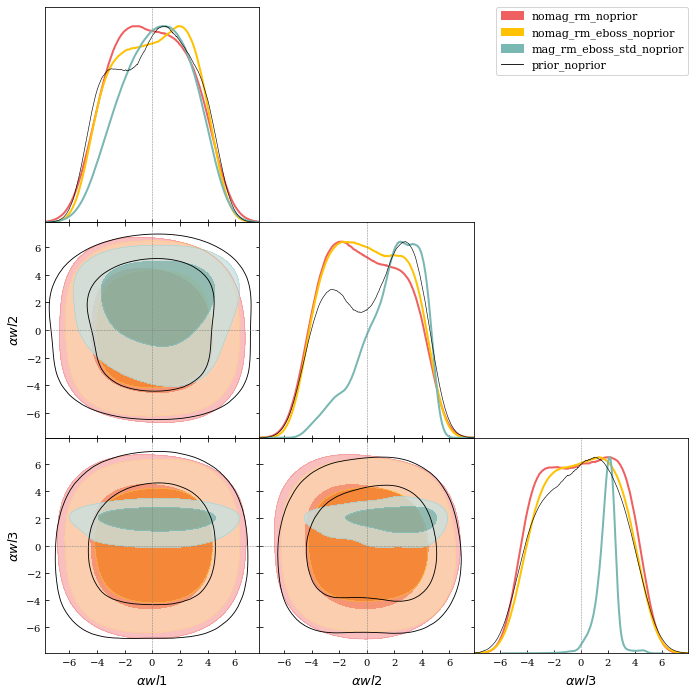

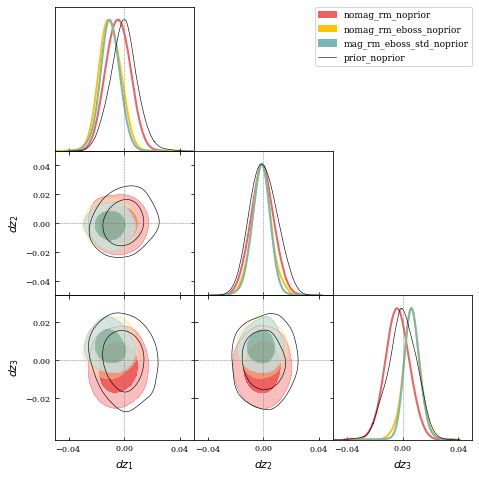

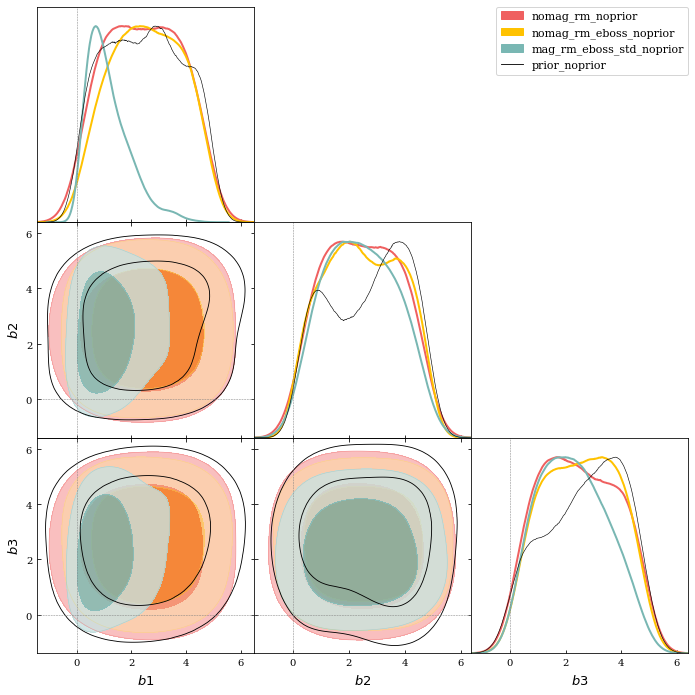

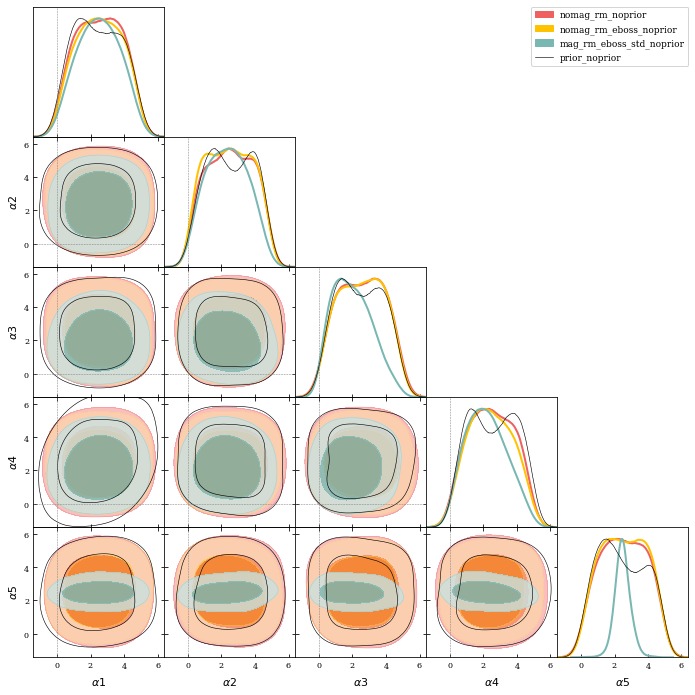

-0.0102 \pm 0.0076
-0.0013 \pm 0.0065
0.0064 \pm 0.0058


In [8]:
Samples=[]
Samples_mag=[]
Samples_mag_WL=[]
Samples_bias_WL=[]
bn = 0
for i,n in enumerate(chains_options) :
    dz1 = np.array(data[n][bn:,4])
    dz2 = np.array(data[n][bn:,5])
    dz3 = np.array(data[n][bn:,6])
    dz4 = np.array(data[n][bn:,7])
    w = np.array(data[n][bn:,-1])

    # bias wl
    b1 = np.array(data[n][bn:,24])
    b2 = np.array(data[n][bn:,25])
    b3 = np.array(data[n][bn:,26])
    
    # wl mag
    alphawl1 = np.array(data[n][bn:,28])
    alphawl2 = np.array(data[n][bn:,29])
    alphawl3 = np.array(data[n][bn:,30])

    # lens mag
    alpha1 = np.array(data[n][bn:,14])
    alpha2 = np.array(data[n][bn:,15])
    alpha3 = np.array(data[n][bn:,16])
    alpha4 = np.array(data[n][bn:,17])
    alpha5 = np.array(data[n][bn:,18])
    #shear_calibration_parameters--m1	shear_calibration_parameters--m2	shear_calibration_parameters--m3	shear_calibration_parameters--m4	wl_photoz_errors--bias_1	wl_photoz_errors--bias_2	wl_photoz_errors--bias_3	wl_photoz_errors--bias_4	lens_photoz_errors--bias_1	lens_photoz_errors--bias_2	lens_photoz_errors--bias_3	bias_lens--b1	bias_lens--b2	bias_lens--b3	mag_alpha_lens--alpha_1	mag_alpha_lens--alpha_2	mag_alpha_lens--alpha_3	mag_alpha_lens--alpha_4	mag_alpha_lens--alpha_5	intrinsic_alignment_parameters--a1	intrinsic_alignment_parameters--a2	intrinsic_alignment_parameters--alpha1	intrinsic_alignment_parameters--alpha2	intrinsic_alignment_parameters--bias_ta	bias_wl--bin_1	bias_wl--bin_2	bias_wl--bin_3	bias_wl--bin_4	mag_alpha_wl--alpha_1	mag_alpha_wl--alpha_2	mag_alpha_wl--alpha_3	mag_alpha_wl--alpha_4	COSMOLOGICAL_PARAMETERS--SIGMA_8	prior	post

    samples = MCSamples(samples=np.c_[dz1,dz2,dz3], weights=(w),
                names = ['dz1','dz2','dz3'], 
                labels = [r'dz_1',r'dz_2',r'dz_3'])

    Samples.append(samples)
    
    samples = MCSamples(samples=np.c_[alpha1,alpha2,alpha3,alpha4,alpha5], weights=(w),
                names = ['alpha1','alpha2','alpha3','alpha4','alpha5'], 
                labels = [r'\alpha 1',r'\alpha 2',r'\alpha 3',r'\alpha 4',r'\alpha5'])

    Samples_mag.append(samples)
    
    samples = MCSamples(samples=np.c_[b1,b2,b3], weights=(w),
                names = ['b1','b2','b3'], 
                labels = [r'b1',r'b2',r'b3'])
    
    Samples_bias_WL.append(samples)
    
    samples = MCSamples(samples=np.c_[alphawl1,alphawl2,alphawl3], weights=(w),
                names = ['alpha1','alpha2','alpha3'], 
                labels = [r'\alpha wl 1',r'\alpha wl 2',r'\alpha wl 3'])

    Samples_mag_WL.append(samples)


    
print ("loaded")
g = plots.getSubplotPlotter(width_inch=10)
g.triangle_plot([Samples_mag_WL[0],Samples_mag_WL[1],Samples_mag_WL[2],Samples_mag_WL[3]],  ['alpha1','alpha2','alpha3'],  
#g.triangle_plot([Samples_mag_WL[0],Samples_mag_WL[1]], ['alpha1','alpha2','alpha3'],  
          filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
          legend_labels=chains_options, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          #line_args=[ {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
          line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
          contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
                       )

plt.show()


g = plots.getSubplotPlotter(width_inch=7)
g.triangle_plot([Samples[0],Samples[1], Samples[2], Samples[3]], ['dz1','dz2','dz3'],  
          filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
          legend_labels=chains_options, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
          contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
          param_limits={'dz1': [-0.05,0.05], 
                        'dz2': [-0.05,0.05],
                        'dz3': [-0.05,0.05]}
                        
                       )

plt.show()


g = plots.getSubplotPlotter(width_inch=10)
g.triangle_plot([Samples_bias_WL[0],Samples_bias_WL[1], Samples_bias_WL[2], Samples_bias_WL[3]],  ['b1','b2','b3'],  
          filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
          legend_labels=chains_options, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
          contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
                       )

plt.show()




g = plots.getSubplotPlotter(width_inch=10)
g.triangle_plot([Samples_mag[0],Samples_mag[1], Samples_mag[2], Samples_mag[3]],  ['alpha1','alpha2','alpha3','alpha4','alpha5'],  
          filled=[True,True,True,False], colors=[c_2,c_3,c_23,c_cs], alphas=[1,0.4,0.8,1.], lw=[3,3,3],
          legend_labels=chains_options, 
          #legend_labels=['mean rm nomag', 'mean rm + spread rm', 'mean eboss nomag','combined'], 
          legend_loc='upper right', 
          line_args=[{'lw':2, 'color':c_2}, {'lw':2, 'color':c_3},  {'lw':2, 'color':c_23},{'lw':0.6, 'color':c_cs}], 
          contour_colors=[c_2,c_3,c_23,'null'], markers=[0.,0.,0.,0.,], 
    
                        
                       )

plt.show()


ix =1
p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz1, 0.68)[1]-Samples[ix].twoTailLimits(p.dz1, 0.68)[0]
m = Samples[ix].mean(p.dz1)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)

p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz2, 0.68)[1]-Samples[ix].twoTailLimits(p.dz2, 0.68)[0]
m = Samples[ix].mean(p.dz2)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)


p = Samples[ix].getParams()
s = Samples[ix].twoTailLimits(p.dz3, 0.68)[1]-Samples[ix].twoTailLimits(p.dz3, 0.68)[0]
m = Samples[ix].mean(p.dz3)
print '{0:2.4f} \pm {1:2.4f}'.format(m,s/2.)




In [2]:

import cPickle as pickle

def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        f.close()
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute

In [10]:
wz_cosmosis1 = load_obj('/global/homes/m/mgatti/clustering-z/WZ_cosmosis1')

In [11]:
wz_cosmosis1.keys()

['syst_mean_rm',
 'th_correction',
 'syst_mean_eboss',
 'mag_pos',
 'Nz_eboss',
 'bincenters_eboss',
 'mag_pos1',
 'alpha_mag_rm',
 'Nz_rm',
 'marg',
 'bincenters_rm',
 'bias_eboss',
 'th_correction_eboss',
 'syst_std_rm',
 'bias_rm']